<a href="https://colab.research.google.com/github/Sanarazaaa/Exploring-Women-Mental-Health-After-Birth/blob/main/Exploring_Women_Mental_Health_After_Birth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files

# Upload the file
uploaded = files.upload()  # Opens a file upload dialog

# Load the dataset
import pandas as pd
data = pd.read_csv(list(uploaded.keys())[0])  # Access the uploaded file dynamically
print(data.head())  # Preview the first 5 rows

Saving Maternal_Health_Dataset.csv to Maternal_Health_Dataset.csv
   Age   BMI  Blood_Pressure  Complications  Postpartum_Depression  \
0   24  27.4             128              0                      0   
1   37  36.0              94              0                      0   
2   32  36.9             111              0                      0   
3   28  18.2             118              1                      0   
4   25  29.2             144              0                      0   

   Bonding_Score  
0           14.1  
1           17.6  
2           49.8  
3           41.9  
4           91.5  


In [ ]:
# Basic information about the dataset
data.info()

# Check for missing values
print(data.isnull().sum())

# Basic statistics
print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    200 non-null    int64  
 1   BMI                    200 non-null    float64
 2   Blood_Pressure         200 non-null    int64  
 3   Complications          200 non-null    int64  
 4   Postpartum_Depression  200 non-null    int64  
 5   Bonding_Score          200 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 9.5 KB
Age                      0
BMI                      0
Blood_Pressure           0
Complications            0
Postpartum_Depression    0
Bonding_Score            0
dtype: int64
              Age         BMI  Blood_Pressure  Complications  \
count  200.000000  200.000000      200.000000     200.000000   
mean    30.800000   29.164000      119.715000       0.315000   
std      8.026339    6.400676       16.573994       0.465682   

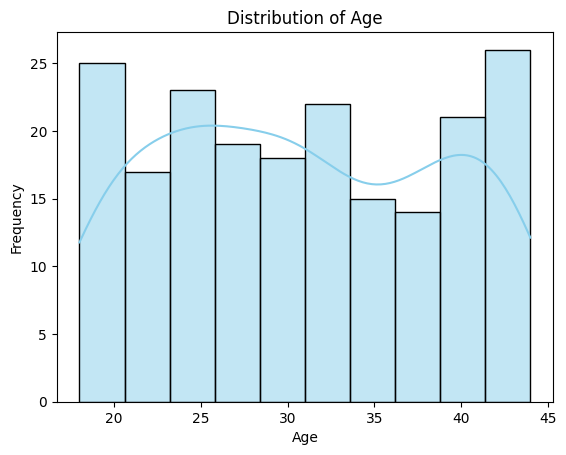

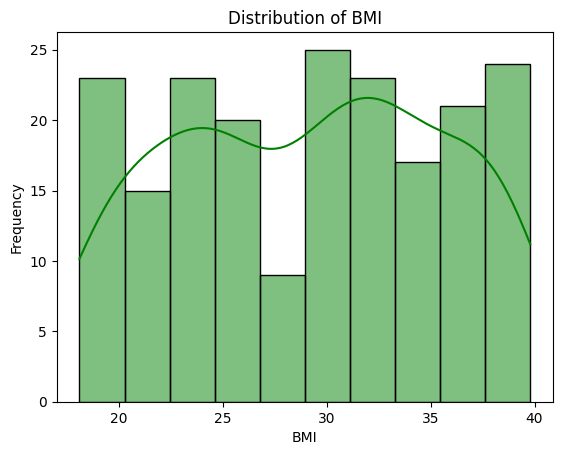

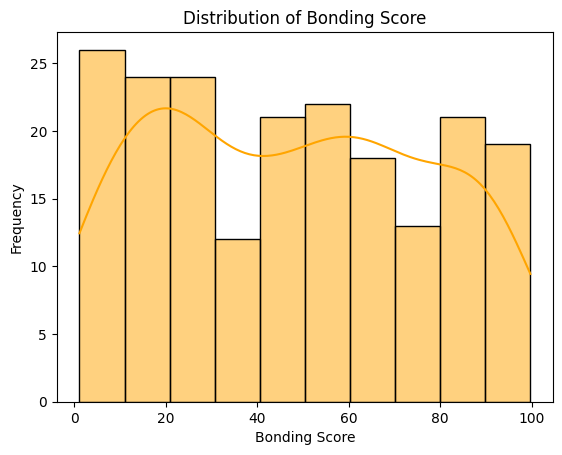

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(data['Age'], kde=True, bins=10, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# BMI distribution
sns.histplot(data['BMI'], kde=True, bins=10, color='green')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.show()

# Bonding Score distribution
sns.histplot(data['Bonding_Score'], kde=True, bins=10, color='orange')
plt.title('Distribution of Bonding Score')
plt.xlabel('Bonding Score')
plt.ylabel('Frequency')
plt.show()

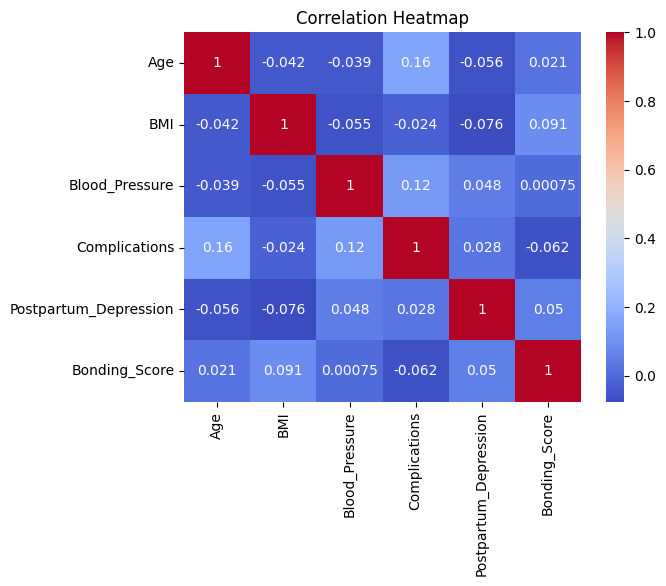

In [ ]:
# Correlation heatmap
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


<ipython-input-7-7ee727b13c07>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Complications', y='Bonding_Score', data=data, palette='Set2')


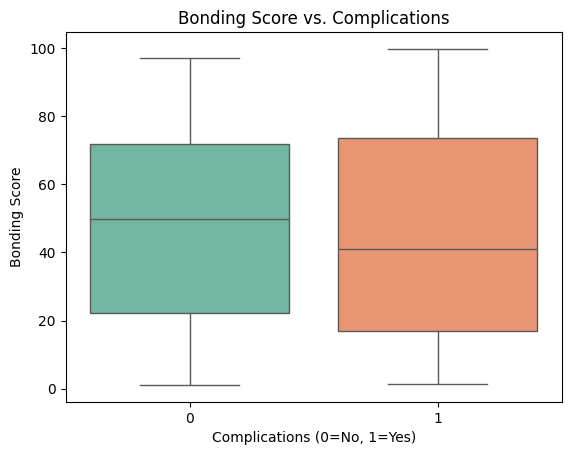

In [ ]:
sns.boxplot(x='Complications', y='Bonding_Score', data=data, palette='Set2')
plt.title('Bonding Score vs. Complications')
plt.xlabel('Complications (0=No, 1=Yes)')
plt.ylabel('Bonding Score')
plt.show()


<ipython-input-8-231945bec3b5>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Postpartum_Depression', y='BMI', data=data, palette='Set3')


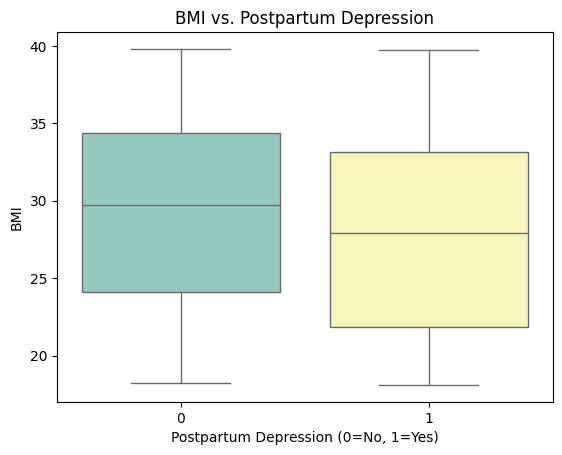

In [ ]:
sns.boxplot(x='Postpartum_Depression', y='BMI', data=data, palette='Set3')
plt.title('BMI vs. Postpartum Depression')
plt.xlabel('Postpartum Depression (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Select features and target variable
X = data[['Age', 'BMI', 'Blood_Pressure', 'Complications']]
y = data['Postpartum_Depression']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.78      0.88      0.82        32
           1       0.00      0.00      0.00         8

    accuracy                           0.70        40
   macro avg       0.39      0.44      0.41        40
weighted avg       0.62      0.70      0.66        40



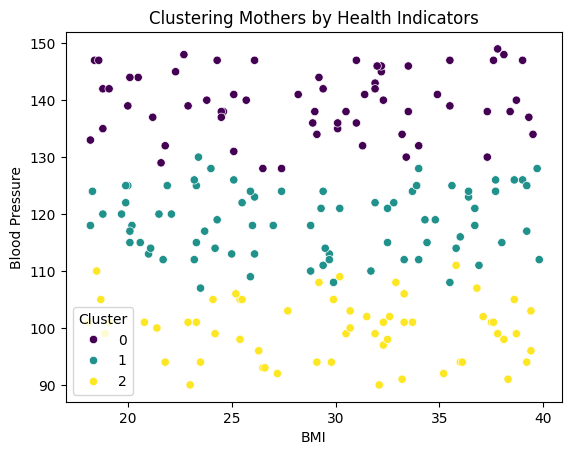

In [ ]:
from sklearn.cluster import KMeans

# Select features for clustering
features = data[['Age', 'BMI', 'Blood_Pressure']]
kmeans = KMeans(n_clusters=3, random_state=0)
data['Cluster'] = kmeans.fit_predict(features)

# Visualize clusters
sns.scatterplot(x='BMI', y='Blood_Pressure', hue='Cluster', data=data, palette='viridis')
plt.title('Clustering Mothers by Heal.th Indicators')
plt.xlabel('BMI')
plt.ylabel('Blood Pressure')
plt.show()

In [11]:
# Mean age comparison
mean_age_by_depression = data.groupby('Postpartum_Depression')['Age'].mean()
print(mean_age_by_depression)

# Display the results more clearly
print("\nAverage Age for Women with Postpartum Depression:")
print(f"{mean_age_by_depression[1]:.2f} years")

print("\nAverage Age for Women without Postpartum Depression:")
print(f"{mean_age_by_depression[0]:.2f} years")


Postpartum_Depression
0    31.018519
1    29.868421
Name: Age, dtype: float64

Average Age for Women with Postpartum Depression:
29.87 years

Average Age for Women without Postpartum Depression:
31.02 years


<ipython-input-12-56d1a2eb926c>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Postpartum_Depression', y='Age', data=data, palette='Set2')


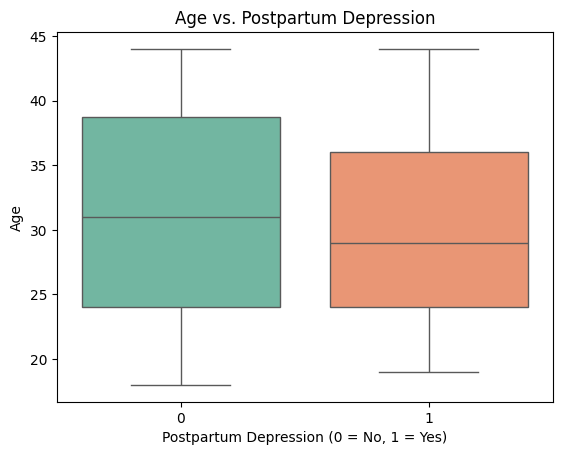

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for age by postpartum depression status
sns.boxplot(x='Postpartum_Depression', y='Age', data=data, palette='Set2')
plt.title('Age vs. Postpartum Depression')
plt.xlabel('Postpartum Depression (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


In [13]:
from scipy.stats import ttest_ind

# Split data into two groups based on Postpartum Depression
age_no_depression = data[data['Postpartum_Depression'] == 0]['Age']
age_with_depression = data[data['Postpartum_Depression'] == 1]['Age']

# Perform a t-test
t_stat, p_value = ttest_ind(age_no_depression, age_with_depression)

# Display results
print(f"T-statistic: {t_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation of the p-value
if p_value < 0.05:
    print("\nThe age difference between the two groups is statistically significant.")
else:
    print("\nThe age difference between the two groups is not statistically significant.")


T-statistic: 0.79
P-value: 0.4280

The age difference between the two groups is not statistically significant.


In [14]:
from scipy.stats import ttest_ind

# Split the data into two groups: women with and without postpartum depression
age_no_depression = data[data['Postpartum_Depression'] == 0]['Age']
age_with_depression = data[data['Postpartum_Depression'] == 1]['Age']

bmi_no_depression = data[data['Postpartum_Depression'] == 0]['BMI']
bmi_with_depression = data[data['Postpartum_Depression'] == 1]['BMI']

bp_no_depression = data[data['Postpartum_Depression'] == 0]['Blood_Pressure']
bp_with_depression = data[data['Postpartum_Depression'] == 1]['Blood_Pressure']

bonding_no_depression = data[data['Postpartum_Depression'] == 0]['Bonding_Score']
bonding_with_depression = data[data['Postpartum_Depression'] == 1]['Bonding_Score']

# Perform t-tests for each variable
def perform_ttest(group1, group2, variable_name):
    t_stat, p_value = ttest_ind(group1, group2)
    print(f"T-test for {variable_name}:")
    print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")
    if p_value < 0.05:
        print(f"{variable_name} is significantly different between the two groups (p < 0.05).")
    else:
        print(f"{variable_name} is not significantly different between the two groups (p >= 0.05).\n")

# Perform t-tests
perform_ttest(age_no_depression, age_with_depression, 'Age')
perform_ttest(bmi_no_depression, bmi_with_depression, 'BMI')
perform_ttest(bp_no_depression, bp_with_depression, 'Blood Pressure')
perform_ttest(bonding_no_depression, bonding_with_depression, 'Bonding Score')


T-test for Age:
T-statistic: 0.79, P-value: 0.4280
Age is not significantly different between the two groups (p >= 0.05).

T-test for BMI:
T-statistic: 1.07, P-value: 0.2866
BMI is not significantly different between the two groups (p >= 0.05).

T-test for Blood Pressure:
T-statistic: -0.67, P-value: 0.5027
Blood Pressure is not significantly different between the two groups (p >= 0.05).

T-test for Bonding Score:
T-statistic: -0.71, P-value: 0.4776
Bonding Score is not significantly different between the two groups (p >= 0.05).



T-Test Results Interpretation:

Age: There is no significant difference in the age between women with and without postpartum depression (p = 0.4280). This suggests that age is not a strong factor influencing postpartum depression in this dataset.

BMI: The difference in BMI between the two groups is also not statistically significant (p = 0.2866), meaning that BMI does not appear to be a strong predictor of postpartum depression.

Blood Pressure: Similarly, blood pressure does not show a significant difference between the groups (p = 0.5027), indicating no direct relationship between blood pressure and postpartum depression.

Bonding Score: The bonding score does not significantly differ between women with and without postpartum depression (p = 0.4776), suggesting that bonding alone might not be a strong differentiator.

In [15]:
from scipy.stats import chi2_contingency

# Create a contingency table for Complications vs. Postpartum Depression
contingency_table = pd.crosstab(data['Postpartum_Depression'], data['Complications'])

# Perform Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2_stat:.2f}")
print(f"P-value: {p_value:.4f}")

# Interpretation
if p_value < 0.05:
    print("\nComplications are significantly associated with postpartum depression.")
else:
    print("\nComplications are not significantly associated with postpartum depression.")


Chi-square statistic: 0.04
P-value: 0.8371

Complications are not significantly associated with postpartum depression.


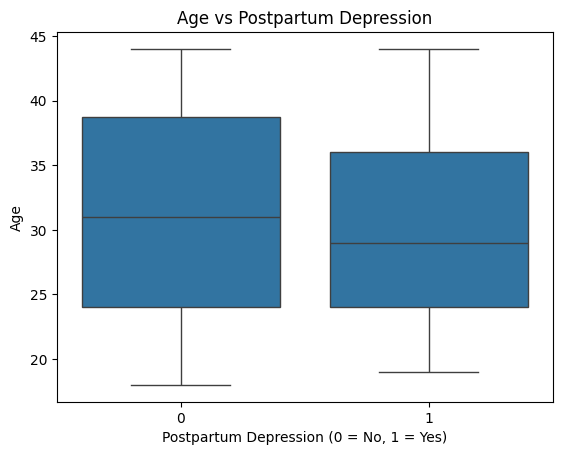

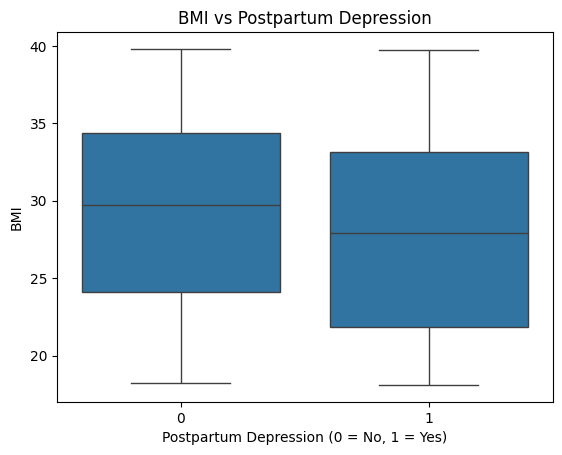

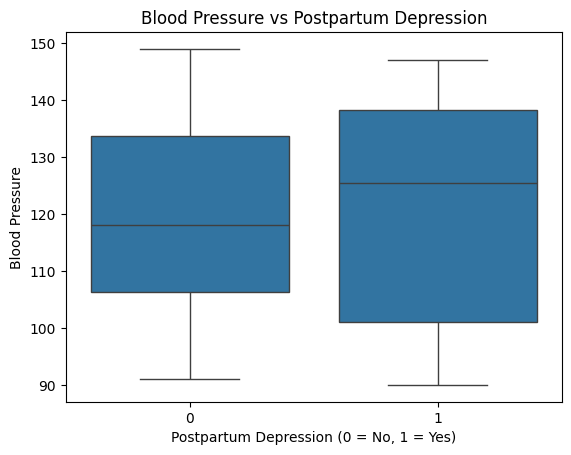

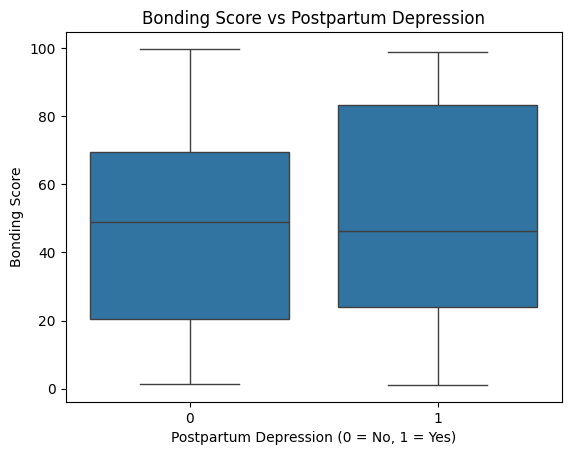

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot for Age vs Postpartum Depression
sns.boxplot(x='Postpartum_Depression', y='Age', data=data)
plt.title('Age vs Postpartum Depression')
plt.xlabel('Postpartum Depression (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()

# Boxplot for BMI vs Postpartum Depression
sns.boxplot(x='Postpartum_Depression', y='BMI', data=data)
plt.title('BMI vs Postpartum Depression')
plt.xlabel('Postpartum Depression (0 = No, 1 = Yes)')
plt.ylabel('BMI')
plt.show()

# Boxplot for Blood Pressure vs Postpartum Depression
sns.boxplot(x='Postpartum_Depression', y='Blood_Pressure', data=data)
plt.title('Blood Pressure vs Postpartum Depression')
plt.xlabel('Postpartum Depression (0 = No, 1 = Yes)')
plt.ylabel('Blood Pressure')
plt.show()

# Boxplot for Bonding Score vs Postpartum Depression
sns.boxplot(x='Postpartum_Depression', y='Bonding_Score', data=data)
plt.title('Bonding Score vs Postpartum Depression')
plt.xlabel('Postpartum Depression (0 = No, 1 = Yes)')
plt.ylabel('Bonding Score')
plt.show()


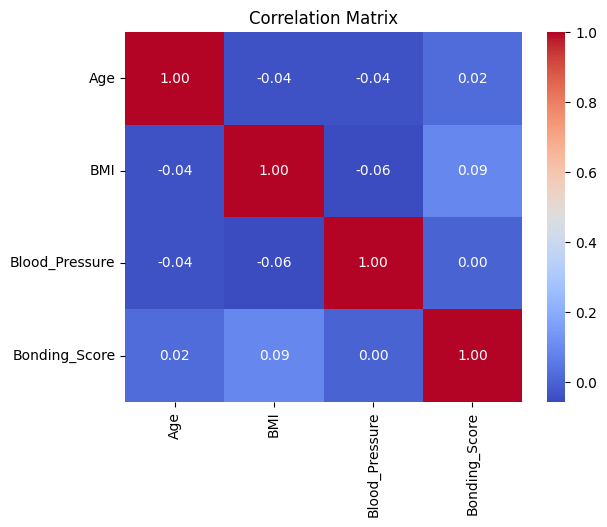

In [17]:
# Correlation matrix for numerical variables
correlation_matrix = data[['Age', 'BMI', 'Blood_Pressure', 'Bonding_Score']].corr()

# Visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = data[['Age', 'BMI', 'Blood_Pressure', 'Complications', 'Bonding_Score']]
y = data['Postpartum_Depression']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")


Model Accuracy: 0.82
